# Prediction Accuracy <img src="files/JHI_STRAP_Web.png" style="width: 150px; float: right;">

This iPython notebook provides an interactive example to demonstrate the variation in effector class (or any other binary) prediction accuracy as the base rate of occurrence varies, for any combination of false positive rate (FPR) and sensitivity, for the predictive method.

**NOTE:** The interactive example component of the example will work only in iPython v2 or greater.

# Theory, and Python functions

The code below defines two functions. The first, `p_correct_given_pos`, calculates the probability that, given that a (binary) classifier prediction is 'positive', the item being classified is truly 'positive', using Bayes' Theorem. 

We can call a member of the 'positive' class $\text{pos}$ (so 'negative's are $\overline{\text{pos}}$), and a positive prediction $\text{+ve}$. Then, the base rate of 'positive' class members is $P(\text{pos})$, the sensitivity of the test is $P(\text{+ve}|\text{pos})$, and the FPR is $1-P(\text{+ve}|\overline{\text{pos}})$.

The probability that if the test/classifier has a positive result, the item being classified is 'positive' ($P(\text{pos}|\text{+ve})$), is then given by Bayes' Theorem:

$$P(\text{pos}|\text{+ve}) = \frac{P(\text{+ve}|\text{pos})P(\text{pos})}{P(\text{+ve}|\text{pos})P(\text{pos}) + P(\text{+ve}|\overline{\text{pos}})P(\overline{\text{pos}})}$$

The second function, `plot_prob_effector`, renders a line graph of the expected value of $P(\text{pos}|\text{+ve})$ against the base rate of positive examples in the dataset being classified.

In [1]:
%pylab inline

from ipywidgets import interact  # for interactive widgets, requires ipywidgets module

def p_correct_given_pos(sens, fpr, b):
    """Returns a simple Bayesian probability for the probability
    that a prediction is correct, given that the prediction
    was positive, given the prevailing sensitivity (sens),
    false positive rate (fpr) and base rate of positive 
    examples.
    """
    assert 0 <= sens <= 1, "Sensitivity must be in range [0,1]"
    assert 0 <= fpr <= 1, "FPR must be in range [0,1]"
    return sens * b / (sens * b + fpr * (1 - b))
    

def plot_prob_effector(sens, fpr, xmax=1, baserate=0.1):
    """Plots a line graph of P(effector|positive test) against
    the baserate of effectors in the input set to the classifier.
        
    The baserate argument draws an annotation arrow
    indicating P(pos|+ve) at that baserate
    """
    assert 0.1 <= xmax <= 1, "Max x axis value must be in range [0,1]"
    assert 0.01 <= baserate <= 1, "Baserate annotation must be in range [0,1]"
    baserates = arange(0, 1.05, xmax * 0.005)  # Range of positive example base rate
    probs = [p_correct_given_pos(sens, fpr, b) for b in baserates]
    plot(baserates, probs, 'r')
    title("P(eff|pos) vs baserate; sens: %.2f, fpr: %.2f" % (sens, fpr))
    ylabel("P(effector|positive)")
    xlabel("effector baserate")
    xlim(0, xmax)
    ylim(0, 1)
    # Add annotation arrow
    xpos, ypos = (baserate, p_correct_given_pos(sens, fpr, baserate))
    if baserate < xmax:
        if xpos > 0.7 * xmax:
            xtextpos = 0.05 * xmax
        else:
            xtextpos = xpos + (xmax-xpos)/5.
        if ypos > 0.5:
            ytextpos = ypos - 0.05
        else:
            ytextpos = ypos + 0.05
        annotate('baserate: %.2f, P(pos|+ve): %.3f' % (xpos, ypos), 
                 xy=(xpos, ypos), 
                 xytext=(xtextpos, ytextpos),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    else:
        text(0.05 * xmax, 0.95, 'baserate: %.2f, P(pos|+ve): %.3f' % (xpos, ypos))

Populating the interactive namespace from numpy and matplotlib


## Single Plot Example

The example below uses the `plot_prob_effector` function to plot a curve of the expected value of $P(\text{effector}|\text{+ve})$ against baseline effector rate, with a sensitivity of 0.95, and false positive rate of 0.05. These values would be exceptionally good for a real-life effector classifier.

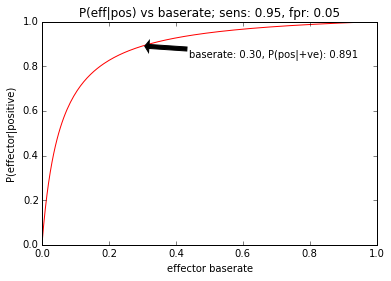

In [2]:
plot_prob_effector(0.95, 0.05, baserate=0.3)

As can be seen from the curve above, a test like this performs very well, such that $P(\text{pos}|\text{+ve}) > 0.8$ for the majority of baseline effector rates - specifically all rates above around 20%.

However, a typical effector class constitutes 3% or less of the total CDS complement of any pathogen, so a test like this would actually be expected to have $P(\text{pos}|\text{+ve}) \approx 0.2$ or lower if applied to a complete pathogen genome CDS complement.

One approach to improve predictive performance in practice is to *stratify* the data to which the classifier is applied. That is, if there are criteria that are necessary for membership of the effector class (e.g. presence of a signal peptide, or characteristic regulatory sequence), these can be used to exclude a large proportion of the genome, and effectively increase the base rate of effectors *with respect to the set of sequences passed to the classifier*.

## Interactive Example

The interactive example below allows you to choose the sensitivity (`sens`) and false positive rate (`fpr`) for the effector classifier, and renders a plot of expected $P(\text{pos}|\text{+ve})$ against base rate of effectors in the input set to the classifier.

By setting the value of `xmax` appropriately, you can zoom in to values for low base rates of effector occurrence.

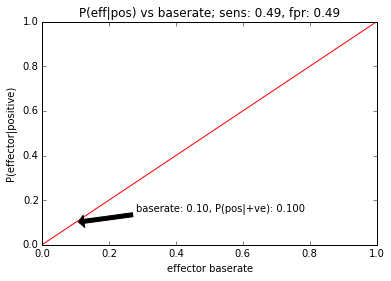

In [3]:
# To see the curve for the T3E prediction method shown in the
# slides, set sens=0.71, fpr=0.15
interact(plot_prob_effector, sens=(0.01, 0.99, 0.01), 
         fpr=(0.01, 0.99, 0.01), xmax=(0.1, 1, 0.01),
         baserate=(0.01, 0.99, 0.01));